# Convert Data to Midi
Data parameters -> Musical Parameters
(X, Y) -> (pitch, intensity)

Tutorial References:

https://medium.com/@astromattrusso/sonification-101-how-to-convert-data-into-music-with-python-71a6dd67751c

https://github.com/SYSTEMSounds/sonification-tutorials/blob/main/data2midi-part1.ipynb

## A. Basics

### 1. Modules & Variables

#### Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from audiolazy import *

#### Set variables

In [2]:
filepath = './brushPositionData01.csv'

### 2. Methods

#### data_overview

In [3]:
# Overview by plotting dataframe by column values

def data_overview(dataframe):
    indices = dataframe.index.values
    for col in (dataframe.columns):

        max_value = max(dataframe[col])
        min_value = min(dataframe[col])
        print('column:', col, ':|:', 'max:', max_value, 'min:', min_value)

        values = dataframe[col].values
        plt.scatter(indices, values, s=1)
        plt.xlabel('index')
        plt.ylabel(col)
        plt.show()

#### map_value

In [4]:
# Maps value (or array of values) from one range to another

def map_value(value, min_input, max_input, min_output, max_output):
    result = min_output + (value - min_input)/(max_input - min_input)*(max_output - min_output)
    return result

### 3. Dataset (.csv file)

Import

In [5]:
df = pd.read_csv(filepath)

Data Overview

... just to look at the overall patterns and structures in the data.

495 records
2 columns
column: x :|: max: 0.2978 min: -0.3863


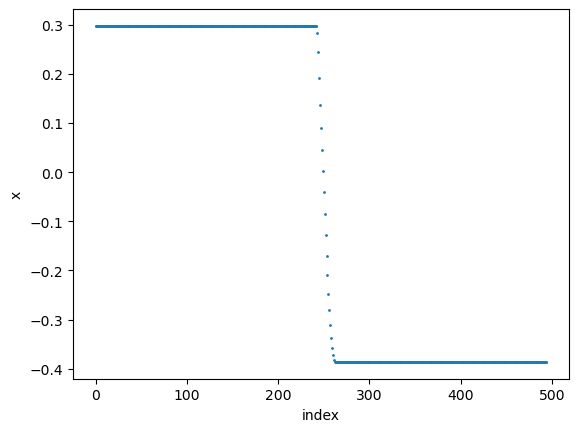

column: y :|: max: 0.2654 min: -0.0859


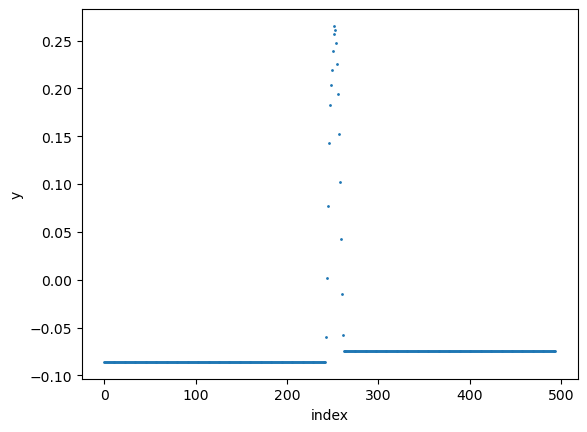

In [6]:
index_length = len(df)
column_length = len(df.columns)
print(index_length, 'records')
print(column_length, 'columns')
df.head()

data_overview(df)

# B. Data Transformation

## Source Data

scale: intensity (from y)


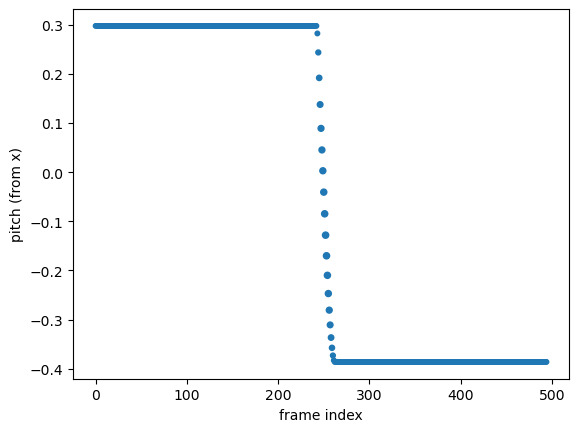

In [7]:
x_positions = df['x'].values
y_positions = df['y'].values
frame_index = df.index.values

pitch = x_positions
intensity = map_value(y_positions, min(y_positions), max(y_positions), 10, 20)

plt.scatter(frame_index, pitch, s=intensity)
plt.xlabel('frame index')
plt.ylabel('pitch (from x)')
print('scale: intensity (from y)')
plt.show()

### Musical Attributes

#### Tempo Set (Compression Time) : Timing
how much do you want it to be compressed by in a particular way

** NOTE:

I'm using different way than the one with the method that Sensei used. 

Because I'm not arranging each records into variable time duration, I'm synchronizing each records corresponding to video footage. 

So the tempo of the sounds depends on the footage FPS and time duration

In [8]:
TARGET_FPS = 15 #(fps)
FRAME_PER_BEAT = 4

ORIGINAL_FPS = 30
retime_scale = TARGET_FPS / ORIGINAL_FPS
time_duration = index_length / TARGET_FPS
fpm = TARGET_FPS * 60
bpm = (fpm / FRAME_PER_BEAT)
timing_data = frame_index / FRAME_PER_BEAT
duration = max(timing_data)

print('total frames :', index_length, 'frames')
print('target fps :', TARGET_FPS, 'fps')
print('retime_scale :', retime_scale, 'x')
print('frame per bit :', FRAME_PER_BEAT)
print('bpm :', bpm, 'bpm')
print('duration :', duration, 'beats')
print('time duration :', time_duration, 's')

timing_data

total frames : 495 frames
target fps : 15 fps
retime_scale : 0.5 x
frame per bit : 4
bpm : 225.0 bpm
duration : 123.5 beats
time duration : 33.0 s


array([  0.  ,   0.25,   0.5 ,   0.75,   1.  ,   1.25,   1.5 ,   1.75,
         2.  ,   2.25,   2.5 ,   2.75,   3.  ,   3.25,   3.5 ,   3.75,
         4.  ,   4.25,   4.5 ,   4.75,   5.  ,   5.25,   5.5 ,   5.75,
         6.  ,   6.25,   6.5 ,   6.75,   7.  ,   7.25,   7.5 ,   7.75,
         8.  ,   8.25,   8.5 ,   8.75,   9.  ,   9.25,   9.5 ,   9.75,
        10.  ,  10.25,  10.5 ,  10.75,  11.  ,  11.25,  11.5 ,  11.75,
        12.  ,  12.25,  12.5 ,  12.75,  13.  ,  13.25,  13.5 ,  13.75,
        14.  ,  14.25,  14.5 ,  14.75,  15.  ,  15.25,  15.5 ,  15.75,
        16.  ,  16.25,  16.5 ,  16.75,  17.  ,  17.25,  17.5 ,  17.75,
        18.  ,  18.25,  18.5 ,  18.75,  19.  ,  19.25,  19.5 ,  19.75,
        20.  ,  20.25,  20.5 ,  20.75,  21.  ,  21.25,  21.5 ,  21.75,
        22.  ,  22.25,  22.5 ,  22.75,  23.  ,  23.25,  23.5 ,  23.75,
        24.  ,  24.25,  24.5 ,  24.75,  25.  ,  25.25,  25.5 ,  25.75,
        26.  ,  26.25,  26.5 ,  26.75,  27.  ,  27.25,  27.5 ,  27.75,
      

#### Normalize

#### Pitch Mapping